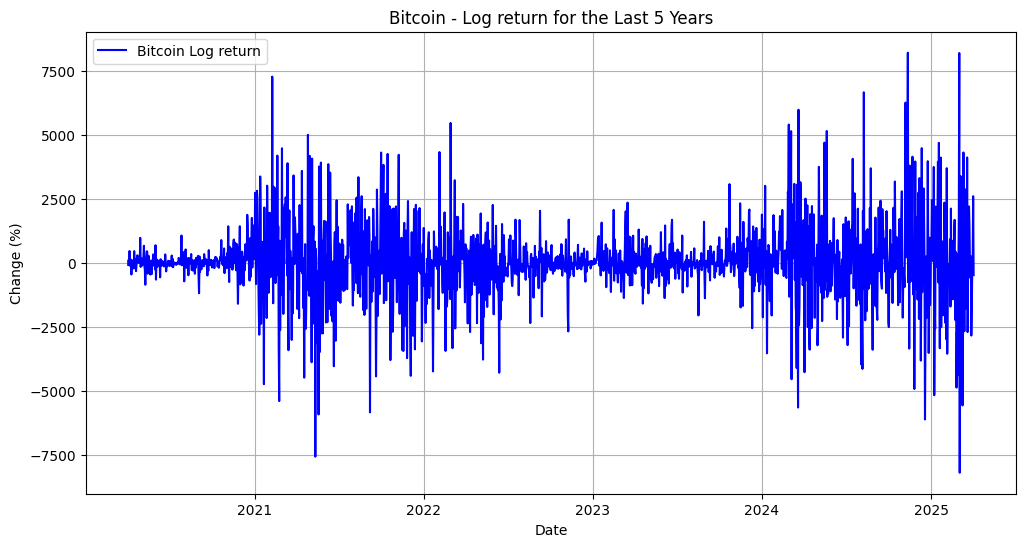

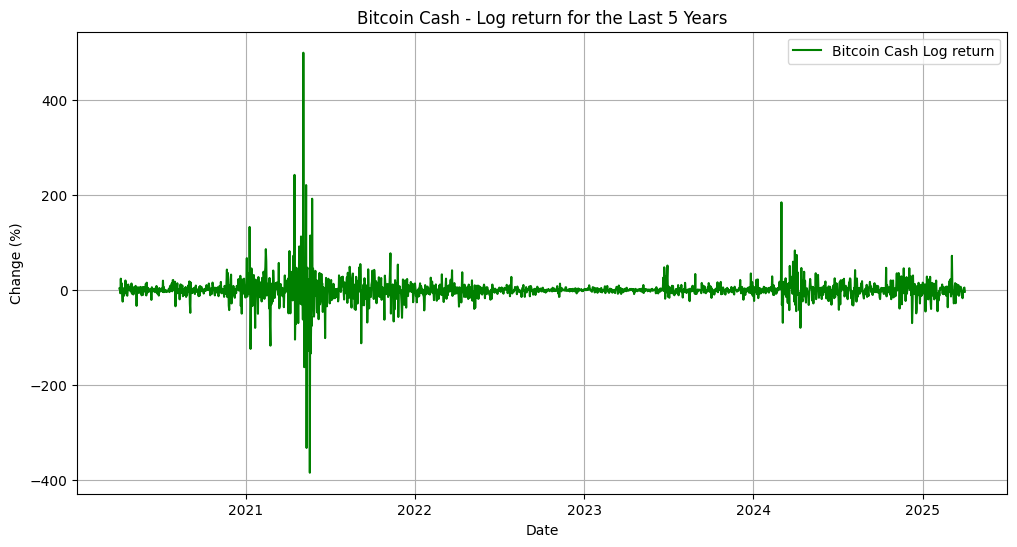

In [ ]:
# Defining % change in price

df_Bitcoin["log_return"] = df_Bitcoin["Close"]-df_Bitcoin["Close"].shift(1)
df_Bitcoin_Cash["log_return"] = df_Bitcoin_Cash["Close"]-df_Bitcoin_Cash["Close"].shift(1)

# Plot the Log returns

plt.figure(figsize=(12, 6))
plt.plot(df_Bitcoin.index, df_Bitcoin["log_return"], label="Bitcoin Log return", color="blue")
plt.xlabel("Date")
plt.ylabel("Change (%)")
plt.title("Bitcoin - Log return for the Last 5 Years")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df_Bitcoin_Cash.index, df_Bitcoin_Cash["log_return"], label="Bitcoin Cash Log return", color="green")
plt.xlabel("Date")
plt.ylabel("Change (%)")
plt.title("Bitcoin Cash - Log return for the Last 5 Years")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Testing for unit roots

# ADF Test for bitcoin closing price
adf_btc_close = adfuller(df_Bitcoin['Close'].dropna(), maxlag=10, regression='c')
print("ADF Test for bitcoin closing price:")
print("Test Statistic:", adf_btc_close[0])
print("p-value:", adf_btc_close[1])
print("Critical Values:", adf_btc_close[4])

# ADF Test for bitcoin Log return in closing price
adf_btc_log_return = adfuller(df_Bitcoin['log_return'].dropna(), maxlag=10, regression='c')
print("\nADF Test for Log return in bitcoin closing price:")
print("Test Statistic:", adf_btc_log_return[0])
print("p-value:", adf_btc_log_return[1])
print("Critical Values:", adf_btc_log_return[4])

# ADF Test for bitcoin cash closing price
adf_btc_c_close = adfuller(df_Bitcoin_Cash['Close'].dropna(), maxlag=10, regression='c')
print("\nADF Test for bitcoin cash closing price:")
print("Test Statistic:", adf_btc_c_close[0])
print("p-value:", adf_btc_c_close[1])
print("Critical Values:", adf_btc_c_close[4])

# ADF Test for bitcoin Log return in closing price
adf_btc_c_log_return = adfuller(df_Bitcoin_Cash['log_return'].dropna(), maxlag=10, regression='c')
print("\nADF Test for Log return in bitcoin cash closing price:")
print("Test Statistic:", adf_btc_c_log_return[0])
print("p-value:", adf_btc_c_log_return[1])
print("Critical Values:", adf_btc_c_log_return[4])

ADF Test for bitcoin closing price:
Test Statistic: -1.0301831597140212
p-value: 0.7420971502831389
Critical Values: {'1%': -3.4339560393603112, '5%': -2.8631328654399884, '10%': -2.5676179883293875}

ADF Test for Log return in bitcoin closing price:
Test Statistic: -12.839975831618274
p-value: 5.634082308578533e-24
Critical Values: {'1%': -3.4339560393603112, '5%': -2.8631328654399884, '10%': -2.5676179883293875}

ADF Test for bitcoin cash closing price:
Test Statistic: -2.9560802882977835
p-value: 0.03920452440282603
Critical Values: {'1%': -3.4339540519343137, '5%': -2.863131988080628, '10%': -2.5676175211639354}

ADF Test for Log return in bitcoin cash closing price:
Test Statistic: -14.090059773981858
p-value: 2.7316505051693226e-26
Critical Values: {'1%': -3.4339540519343137, '5%': -2.863131988080628, '10%': -2.5676175211639354}


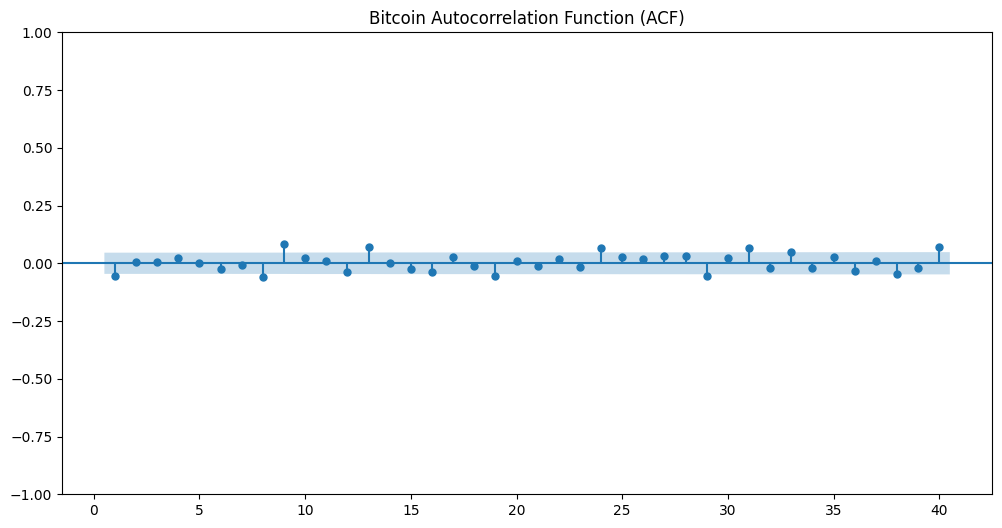

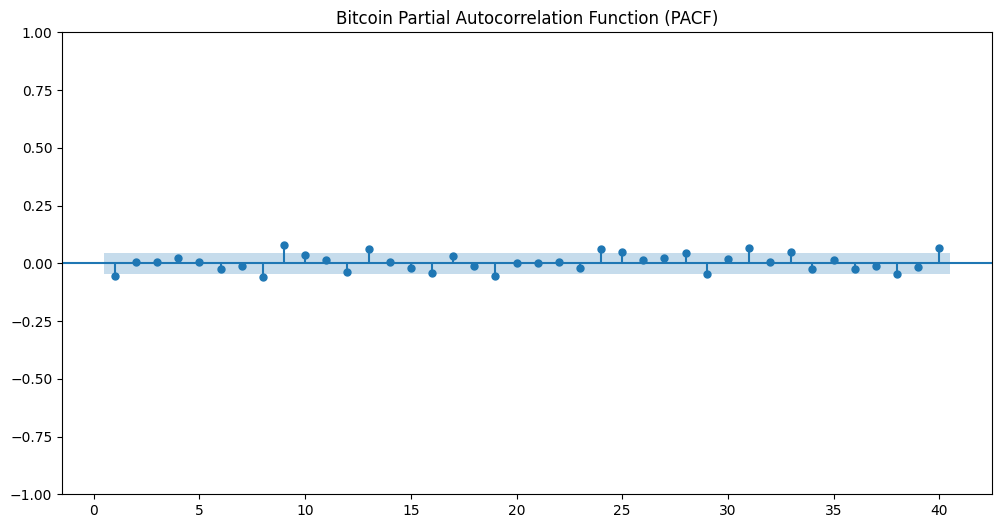

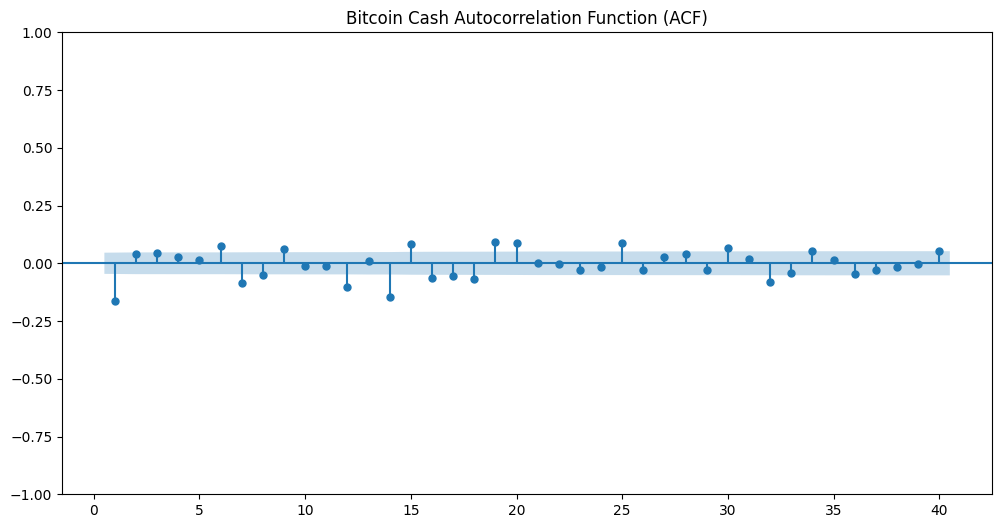

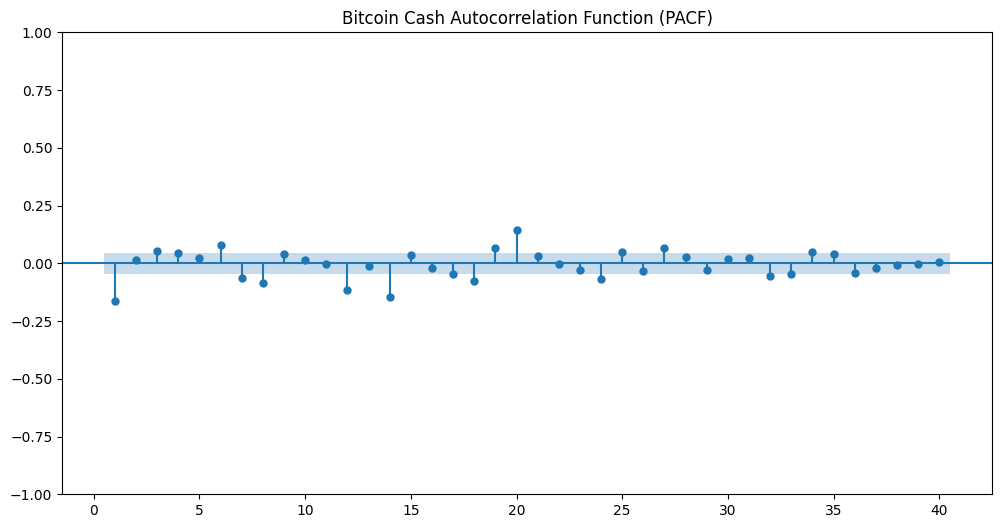

In [ ]:
# ACF and PACF

# Plot ACF Bitcoin
plt.figure(figsize=(12,6))
plot_acf(df_Bitcoin['log_return'].iloc[1:], lags=40, ax=plt.gca(), zero=False)
plt.title('Bitcoin Autocorrelation Function (ACF)')
plt.show()

# Plot PACF Bitcoin
plt.figure(figsize=(12,6))
plot_pacf(df_Bitcoin['log_return'].iloc[1:], lags=40, ax=plt.gca(), zero=False)
plt.title('Bitcoin Partial Autocorrelation Function (PACF)')
plt.show()

# Plot ACF Bitcoin Cash
plt.figure(figsize=(12,6))
plot_acf(df_Bitcoin_Cash['log_return'].iloc[1:], lags=40, ax=plt.gca(), zero=False)
plt.title('Bitcoin Cash Autocorrelation Function (ACF)')
plt.show()

# Plot PACF Bitcoin Cash
plt.figure(figsize=(12,6))
plot_pacf(df_Bitcoin_Cash['log_return'].iloc[1:], lags=40, ax=plt.gca(), zero=False)
plt.title('Bitcoin Cash Autocorrelation Function (PACF)')
plt.show()

In [ ]:
# Fit best ARIMA model for bitcoin

# Initialize AIC and BIC tables (6x6 matrices)
aic_table = np.full((6, 6), np.nan)  # AIC values
bic_table = np.full((6, 6), np.nan)  # BIC values

# Fit ARIMA models for different (p, d=0, q) combinations
for ar in range(6):
    for ma in range(6):
        try:
            model = ARIMA(df_Bitcoin["log_return"], order=(ar, 0, ma))
            fitted_model = model.fit()
            print(fitted_model.llf)
            print(fitted_model.df_model)
            aic_table[ar, ma] = fitted_model.aic  # Store AIC
            bic_table[ar, ma] = fitted_model.bic  # Store BIC
        except:
            # In case of a model fitting error, we skip this combination
            pass

# Display AIC and BIC tables
print("AIC Table:\n", aic_table)
print("\nBIC Table:\n", bic_table)

# Find the (p, q) combination with the lowest AIC
min_aic_index = np.unravel_index(np.nanargmin(aic_table), aic_table.shape)
min_bic_index = np.unravel_index(np.nanargmin(bic_table), bic_table.shape)

print(f"\nBest ARMA(p,q) for AIC: p={min_aic_index[0]}, q={min_aic_index[1]}")
print(f"Best ARMA(p,q) for BIC: p={min_bic_index[0]}, q={min_bic_index[1]}")

C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


-15856.873632516423
2
-15854.1604894907
3
-15854.11730313318
4


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: Val

-15854.080456662836
5


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


-15853.508560003105
6


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


-15853.501520834494
7
-15854.128399644502
3
-15854.118107268463
4


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: Val

-15854.04240736318
5


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


-15853.96315674642
6


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


-15852.39610108906
7


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


-15853.520914291645
8
-15854.11496069983
4


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: Val

-15854.115355081809
5


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


-15851.843709702705
6


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


-15852.256319916494
7


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\t

-15850.460066206655
8
-15853.4059290891
9
-15854.093005728093
5


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: Val

-15854.08754940637
6


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


-15851.303430157659
7


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packa

-15851.128408275312
8


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packa

-15846.53236474652
9


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


-15844.142292887045
10
-15853.560664839728
6


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: Val

-15853.558616737242
7
-15850.892366130949
8


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packa

-15850.861495587724
9
-15851.48481283893
10


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\t

-15838.664992861493
11
-15853.54888743272
7


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


-15853.554773118205
8


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packa

-15846.389857297465
9


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\states

-15842.464146989232
10


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


-15848.113228649216
11
-15838.647802492575
12
AIC Table:
 [[31717.74726503 31714.32097898 31716.23460627 31718.16091333
  31719.01712001 31721.00304167]
 [31714.25679929 31716.23621454 31718.08481473 31719.92631349
  31718.79220218 31723.04182858]
 [31716.2299214  31718.23071016 31715.68741941 31718.51263983
  31716.92013241 31724.81185818]
 [31718.18601146 31720.17509881 31716.60686032 31718.25681655
  31711.06472949 31708.28458577]
 [31719.12132968 31721.11723347 31717.78473226 31719.72299118
  31722.96962568 31699.32998572]
 [31721.09777487 31723.10954624 31710.77971459 31704.92829398
  31718.2264573  31701.29560499]]

BIC Table:
 [[31728.76812615 31730.85227065 31738.27632849 31745.71306611
  31752.07970334 31759.57605556]
 [31730.78809096 31738.27793676 31745.63696751 31752.98889683
  31757.36521607 31767.12527303]
 [31738.27164363 31745.78286295 31748.75000274 31757.08565373
  31761.00357686 31774.40573319]
 [31745.73816424 31753.23768215 31755.17987421 31762.340261
  31760.65860

C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# Fit best ARIMA model for bitcoin cash

# Initialize AIC and BIC tables (6x6 matrices)
aic_table = np.full((6, 6), np.nan)  # AIC values
bic_table = np.full((6, 6), np.nan)  # BIC values

# Fit ARIMA models for different (p, d=0, q) combinations
for ar in range(6):
    for ma in range(6):
        try:
            model = ARIMA(df_Bitcoin_Cash["log_return"], order=(ar, 0, ma))
            fitted_model = model.fit()
            print(fitted_model.llf)
            print(fitted_model.df_model)
            aic_table[ar, ma] = fitted_model.aic  # Store AIC
            bic_table[ar, ma] = fitted_model.bic  # Store BIC
        except:
            # In case of a model fitting error, we skip this combination
            pass

# Display AIC and BIC tables
print("AIC Table:\n", aic_table)
print("\nBIC Table:\n", bic_table)

# Find the (p, q) combination with the lowest AIC
min_aic_index = np.unravel_index(np.nanargmin(aic_table), aic_table.shape)
min_bic_index = np.unravel_index(np.nanargmin(bic_table), bic_table.shape)

print(f"\nBest ARMA(p,q) for AIC: p={min_aic_index[0]}, q={min_aic_index[1]}")
print(f"Best ARMA(p,q) for BIC: p={min_bic_index[0]}, q={min_bic_index[1]}")

C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


-8653.728824348764
2
-8630.429299087238
3


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: Val

-8627.591218295831
4


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


-8625.323436719567
5


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


-8623.322714029919
6


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


-8621.955853914078
7
-8628.772532229013
3


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: Val

-8628.665365408677
4


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


-8623.504875881383
5


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


-8622.708931108777
6


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


-8622.294102673502
7


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


-8621.60731975455
8
-8628.597966425916
4


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: Val

-8625.926894207807
5


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


-8622.25973063538
6


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


-8623.432253218118
7


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


-8622.423298472086
8


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


-8596.106137112447
9


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


-8626.043153954364
5


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


-8623.69166369882
6


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packa

-8616.97642511969
7


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\t

-8617.44646665568
8
-8614.272383112791
9


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\t

-8596.054334227847
10
-8624.340373974028
6
-8623.266666265308
7


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packa

-8623.023583025926
8


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packa

-8608.629791854693
9


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


-8605.704169672637
10


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


-8608.373940285072
11
-8623.783231478687
7


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


-8622.937354487269
8


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packa

-8598.301993637668
9


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


-8613.472723116523
10


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\states

-8597.618954738495
11
-8608.054418064885
12
AIC Table:
 [[17311.4576487  17266.85859817 17263.18243659 17260.64687344
  17258.64542806 17257.91170783]
 [17263.54506446 17265.33073082 17257.00975176 17257.41786222
  17258.58820535 17259.21463951]
 [17265.19593285 17261.85378842 17256.51946127 17260.86450644
  17260.84659694 17210.21227422]
 [17262.08630791 17259.3833274  17247.95285024 17250.89293331
  17246.54476623 17212.10866846]
 [17260.68074795 17260.53333253 17262.04716605 17235.25958371
  17231.40833935 17238.74788057]
 [17261.56646296 17261.87470897 17214.60398728 17246.94544623
  17217.23790948 17240.10883613]]

BIC Table:
 [[17322.47850981 17283.38988984 17285.22415882 17288.19902622
  17291.7080114  17296.48472172]
 [17280.07635613 17287.37245304 17284.56190454 17290.48044556
  17297.16121924 17303.29808396]
 [17287.23765508 17289.4059412  17289.58204461 17299.43752033
  17304.9300414  17259.80614923]
 [17289.63846069 17292.44591074 17286.52586413 17294.97637776
  17296.13864

C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# Predictions using ARIMA models

# Bitcoin predictions using ARIMA(0,0)

btc_model = ARIMA(df_Bitcoin["log_return"].iloc[:-10], order=(4, 0, 5))
fitted_btc_model = btc_model.fit()

# Dynamic forecast for 10 future days
forecast_steps = 10
dynamic_btc_forecast = fitted_btc_model.forecast(steps=forecast_steps)

# Print forecast
print(dynamic_btc_forecast)

# Bitcoin cash predictions using ARIMA(1,0)

btc_c_model = ARIMA(df_Bitcoin_Cash["log_return"].iloc[:-10], order=(2, 0, 5))
fitted_btc_c_model = btc_c_model.fit()

# Dynamic forecast for 10 future days
forecast_steps = 10
dynamic_btc_c_forecast = fitted_btc_c_model.forecast(steps=forecast_steps)

# Print forecast
print(dynamic_btc_c_forecast)

C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2025-03-24 00:00:00+00:00     63.210014
2025-03-25 00:00:00+00:00   -325.176855
2025-03-26 00:00:00+00:00   -166.647585
2025-03-27 00:00:00+00:00    365.698074
2025-03-28 00:00:00+00:00    407.091247
2025-03-29 00:00:00+00:00   -185.528546
2025-03-30 00:00:00+00:00   -342.815944
2025-03-31 00:00:00+00:00    129.426578
2025-04-01 00:00:00+00:00    483.102061
2025-04-02 00:00:00+00:00     59.039533
Freq: D, Name: predicted_mean, dtype: float64


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2025-03-24 00:00:00+00:00   -2.029855
2025-03-25 00:00:00+00:00    2.626404
2025-03-26 00:00:00+00:00    0.706810
2025-03-27 00:00:00+00:00   -1.926698
2025-03-28 00:00:00+00:00   -0.927129
2025-03-29 00:00:00+00:00    1.416026
2025-03-30 00:00:00+00:00    1.740958
2025-03-31 00:00:00+00:00   -0.333830
2025-04-01 00:00:00+00:00   -1.785080
2025-04-02 00:00:00+00:00   -0.586555
Freq: D, Name: predicted_mean, dtype: float64


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                       Date  Actual_Close  Predicted_Close
0 2025-03-24 00:00:00+00:00  87498.914062     2.435193e+32
1 2025-03-25 00:00:00+00:00  87471.703125    1.458879e-109
2 2025-03-26 00:00:00+00:00  86900.882812    6.164426e-182
3 2025-03-27 00:00:00+00:00  87177.101562     4.078950e-23
4 2025-03-28 00:00:00+00:00  84353.148438    2.558766e+154
5 2025-03-29 00:00:00+00:00  82597.585938     6.823492e+73
6 2025-03-30 00:00:00+00:00  82334.523438     8.931698e-76
7 2025-03-31 00:00:00+00:00  82548.914062     1.446048e-19
8 2025-04-01 00:00:00+00:00  85169.171875    9.305550e+190
9 2025-04-02 00:00:00+00:00  84705.617188    4.067107e+216


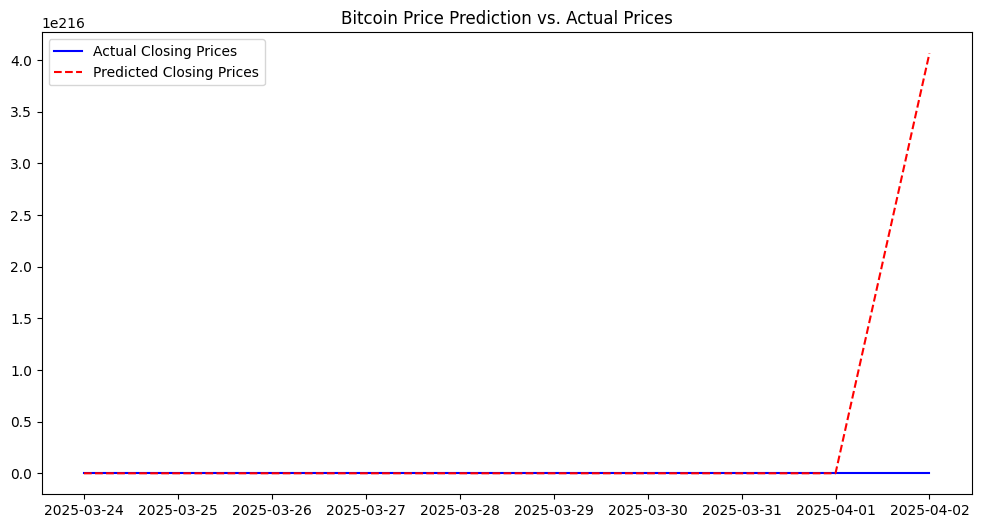

In [ ]:
# Get the last known closing price before the test period
last_known_price = df_Bitcoin["Close"].iloc[-forecast_steps - 1]

# Convert predicted log returns to closing prices
predicted_prices = [last_known_price]  # Start with last known price
for log_ret in dynamic_btc_forecast:
    next_price = predicted_prices[-1] * np.exp(log_ret)  # Reverse log transformation
    predicted_prices.append(next_price)

# Remove the first element if you don't want the starting point
predicted_prices = predicted_prices[1:]

# Get actual closing prices for comparison
actual_prices = df_Bitcoin["Close"].iloc[-forecast_steps:]

# Create DataFrame for comparison
comparison_df_btc = pd.DataFrame({
    "Date": actual_prices.index,
    "Actual_Close": actual_prices.values,
    "Predicted_Close": predicted_prices
})

# Print comparison table
print(comparison_df_btc)

# Plot actual vs. predicted closing prices
plt.figure(figsize=(12, 6))
plt.plot(comparison_df_btc["Date"], comparison_df_btc["Actual_Close"], label="Actual Closing Prices", color="blue")
plt.plot(comparison_df_btc["Date"], comparison_df_btc["Predicted_Close"], label="Predicted Closing Prices", linestyle="dashed", color="red")

plt.title("Bitcoin Price Prediction vs. Actual Prices")
plt.legend()
plt.show()

                       Date  Actual_Close  Predicted_Close
0 2025-03-24 00:00:00+00:00    332.194458        42.726615
1 2025-03-25 00:00:00+00:00    335.666718       590.651562
2 2025-03-26 00:00:00+00:00    334.572693      1197.553722
3 2025-03-27 00:00:00+00:00    324.701660       174.397655
4 2025-03-28 00:00:00+00:00    307.460358        69.007075
5 2025-03-29 00:00:00+00:00    303.107391       284.358341
6 2025-03-30 00:00:00+00:00    298.847687      1621.640580
7 2025-03-31 00:00:00+00:00    303.316467      1161.378946
8 2025-04-01 00:00:00+00:00    308.483002       194.860475
9 2025-04-02 00:00:00+00:00    304.863892       108.389260


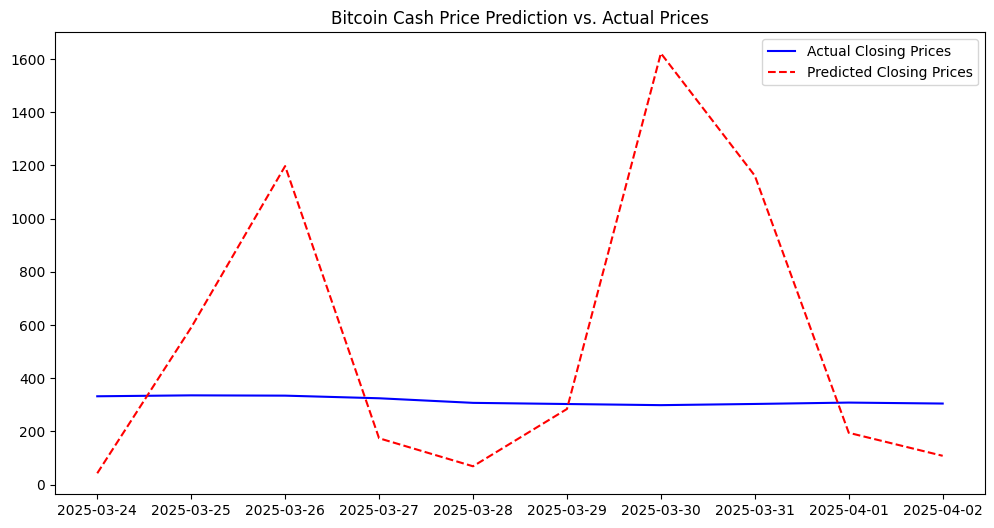

In [ ]:
# Get the last known closing price before the test period
last_known_price = df_Bitcoin_Cash["Close"].iloc[-forecast_steps - 1]

# Convert predicted log returns to closing prices
predicted_prices = [last_known_price]  # Start with last known price
for log_ret in dynamic_btc_c_forecast:
    next_price = predicted_prices[-1] * np.exp(log_ret)  # Reverse log transformation
    predicted_prices.append(next_price)

# Remove the first element if you don't want the starting point
predicted_prices = predicted_prices[1:]

# Get actual closing prices for comparison
actual_prices = df_Bitcoin_Cash["Close"].iloc[-forecast_steps:]

# Create DataFrame for comparison
comparison_df_btc_c = pd.DataFrame({
    "Date": actual_prices.index,
    "Actual_Close": actual_prices.values,
    "Predicted_Close": predicted_prices
})

# Print comparison table
print(comparison_df_btc_c)

# Plot actual vs. predicted closing prices
plt.figure(figsize=(12, 6))
plt.plot(comparison_df_btc_c["Date"], comparison_df_btc_c["Actual_Close"], label="Actual Closing Prices", color="blue")
plt.plot(comparison_df_btc_c["Date"], comparison_df_btc_c["Predicted_Close"], label="Predicted Closing Prices", linestyle="dashed", color="red")

plt.title("Bitcoin Cash Price Prediction vs. Actual Prices")
plt.legend()
plt.show()

In [ ]:
mse_btc = mean_squared_error(comparison_df_btc['Actual_Close'], comparison_df_btc['Predicted_Close'])
mae_btc = mean_absolute_error(comparison_df_btc['Actual_Close'], comparison_df_btc['Predicted_Close'])

mse_btc_c = mean_squared_error(comparison_df_btc_c['Actual_Close'], comparison_df_btc_c['Predicted_Close'])
mae_btc_c = mean_absolute_error(comparison_df_btc_c['Actual_Close'], comparison_df_btc_c['Predicted_Close'])

# Print the results
print(f"Bitcoin ARIMA MSE: {mse_btc}, MAE: {mae_btc}")
print(f"Bitcoin Cash ARIMA MSE: {mse_btc_c}, MAE: {mae_btc_c}")

Bitcoin ARIMA MSE: inf, MAE: 4.067106534845541e+215
Bitcoin Cash ARIMA MSE: 351091.25649568776, MAE: 430.58925860264645


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:501: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
